<a href="https://colab.research.google.com/github/Amadou794545/Segmentation-des-clients-d-un-site-de-e-commerce/blob/main/Segmentation_des_clients_d'un_site_de_e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from scipy.stats import pearsonr

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

#Importation des données

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Segmentation-de-client-le-dans-Python/main/Wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


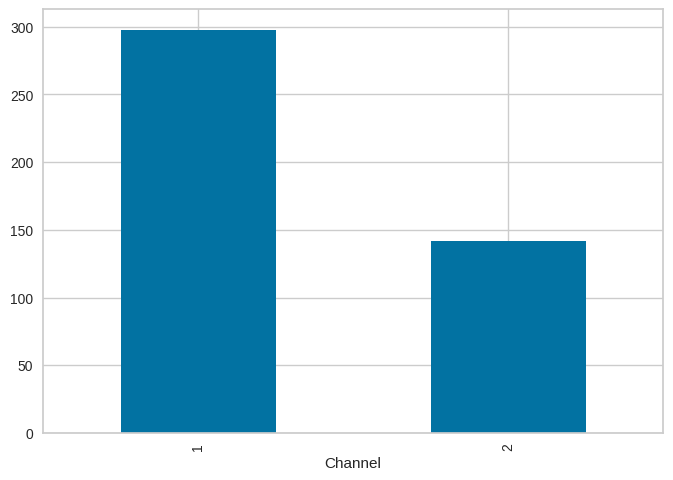

In [77]:
 df['Channel'].value_counts().plot(kind='bar');

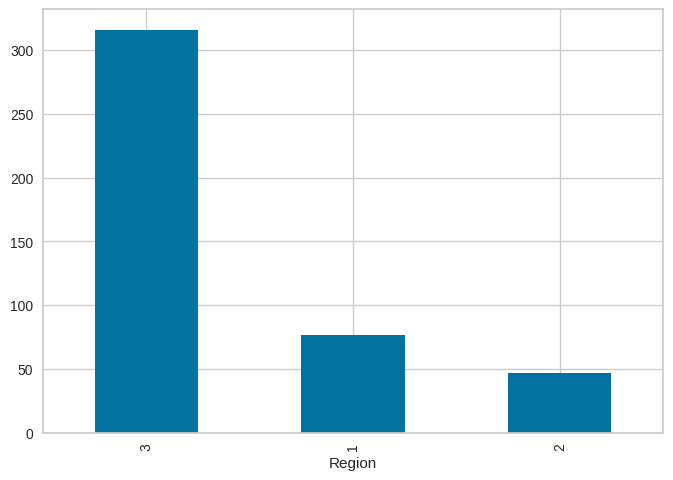

In [78]:
 df['Region'].value_counts().plot(kind='bar');

In [79]:
df = df.rename(columns={'Delicassen': 'Delicatessen'})
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [80]:
df['Channel']=df['Channel'].map({1:'HoReCa',2:'Retail'})
df['Region']=df['Region'].map({1:'Lisboa',2:'Porto',3:'Other'})
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [81]:
features= df.columns.tolist()

In [82]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [83]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [85]:
df.to_csv('df_processed.csv')

In [86]:
df = pd.read_csv('df_processed.csv',index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


#EDA

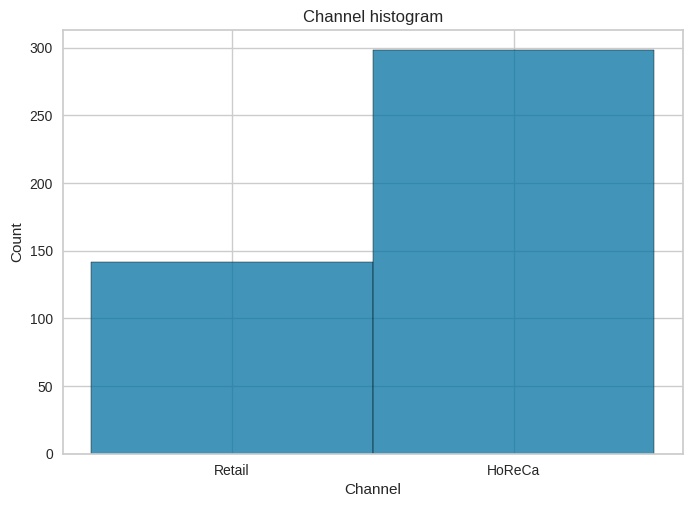

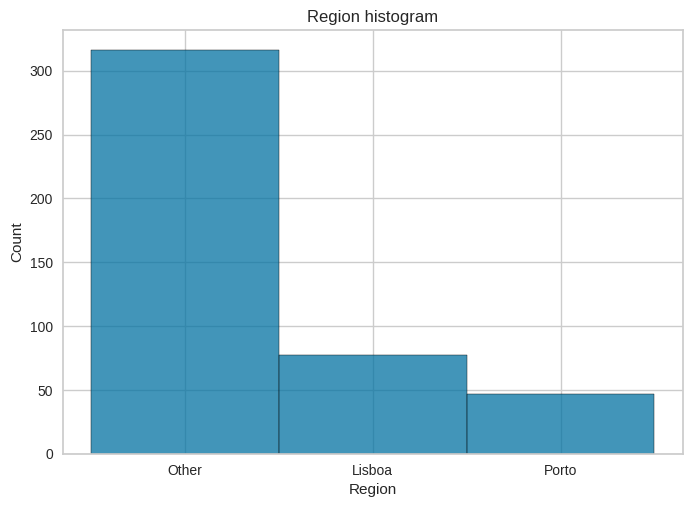

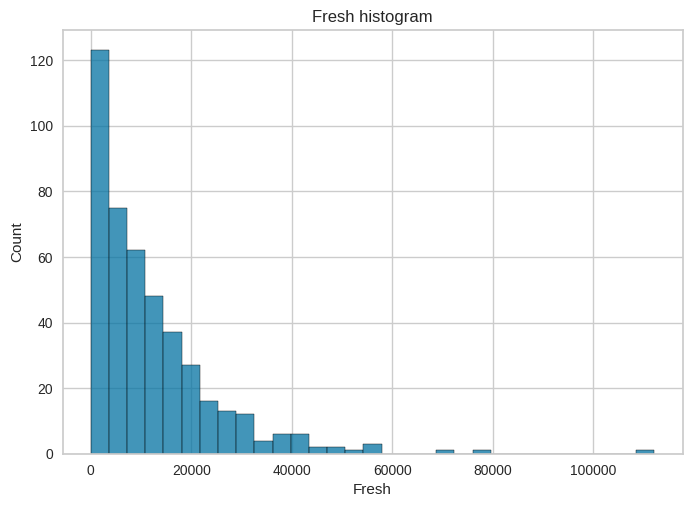

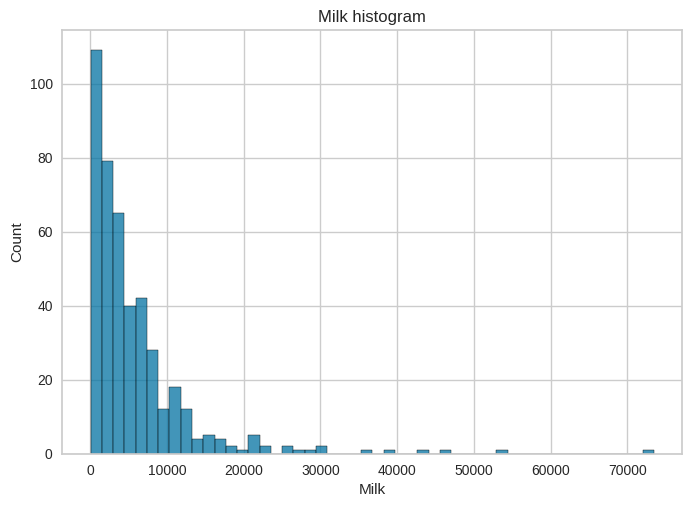

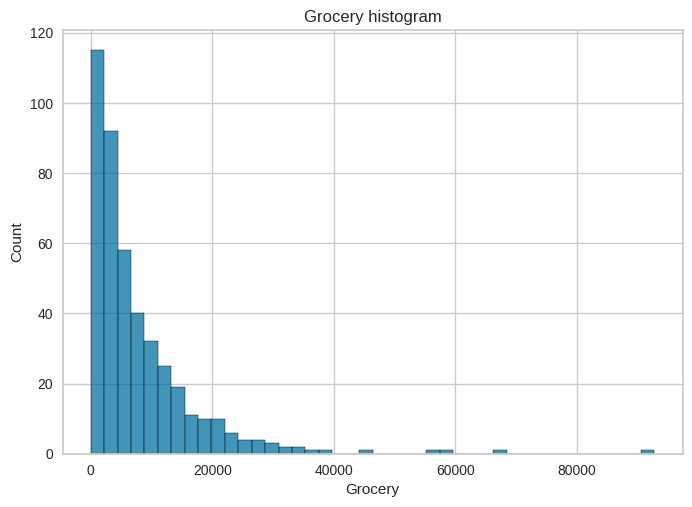

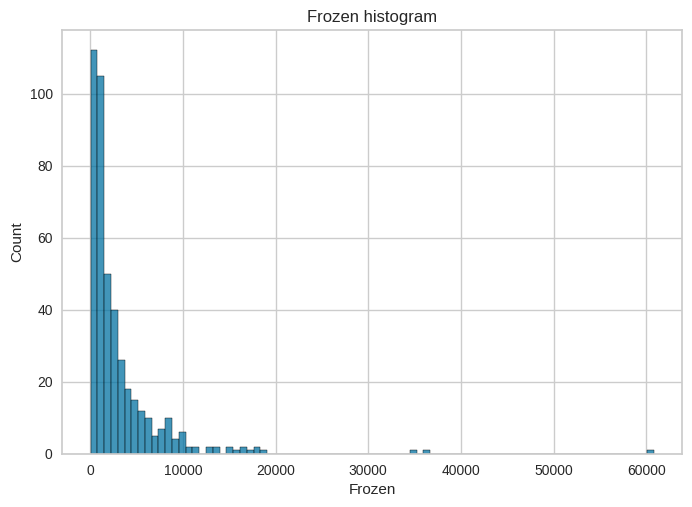

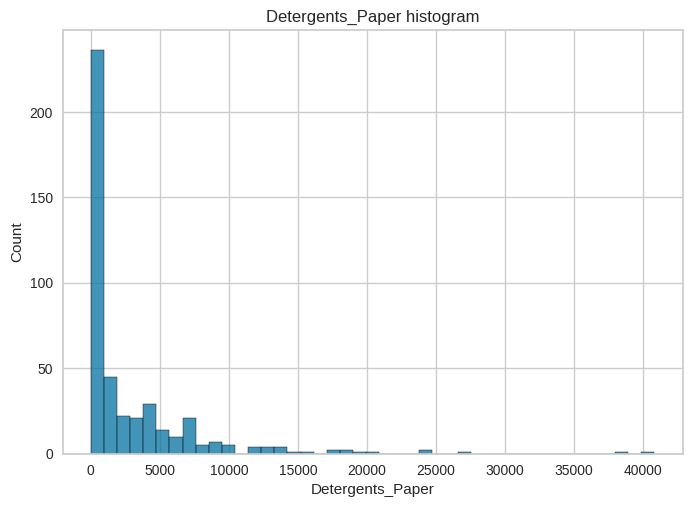

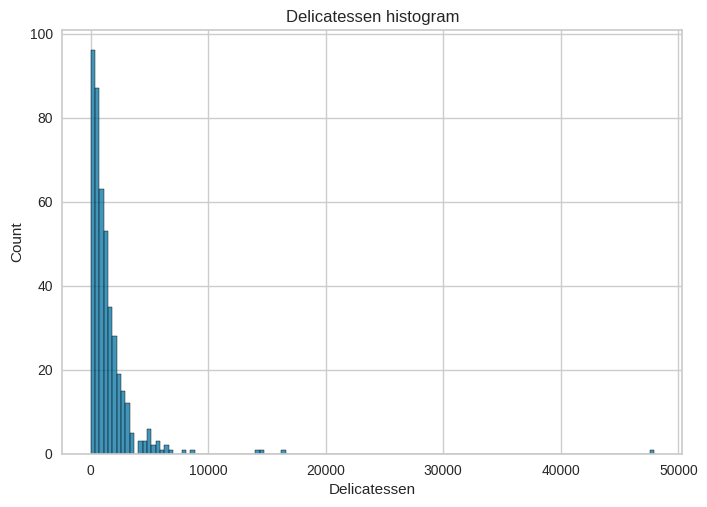

In [88]:
for feature in features:
  if feature == 'Channel' and feature == 'Region':
    sns.countplot(x=df[feature]).set_title(f'{feature} countplot')
    plt.show()
  else:
    sns.histplot(x=df[feature]).set_title(f'{feature} histogram')
    plt.show()

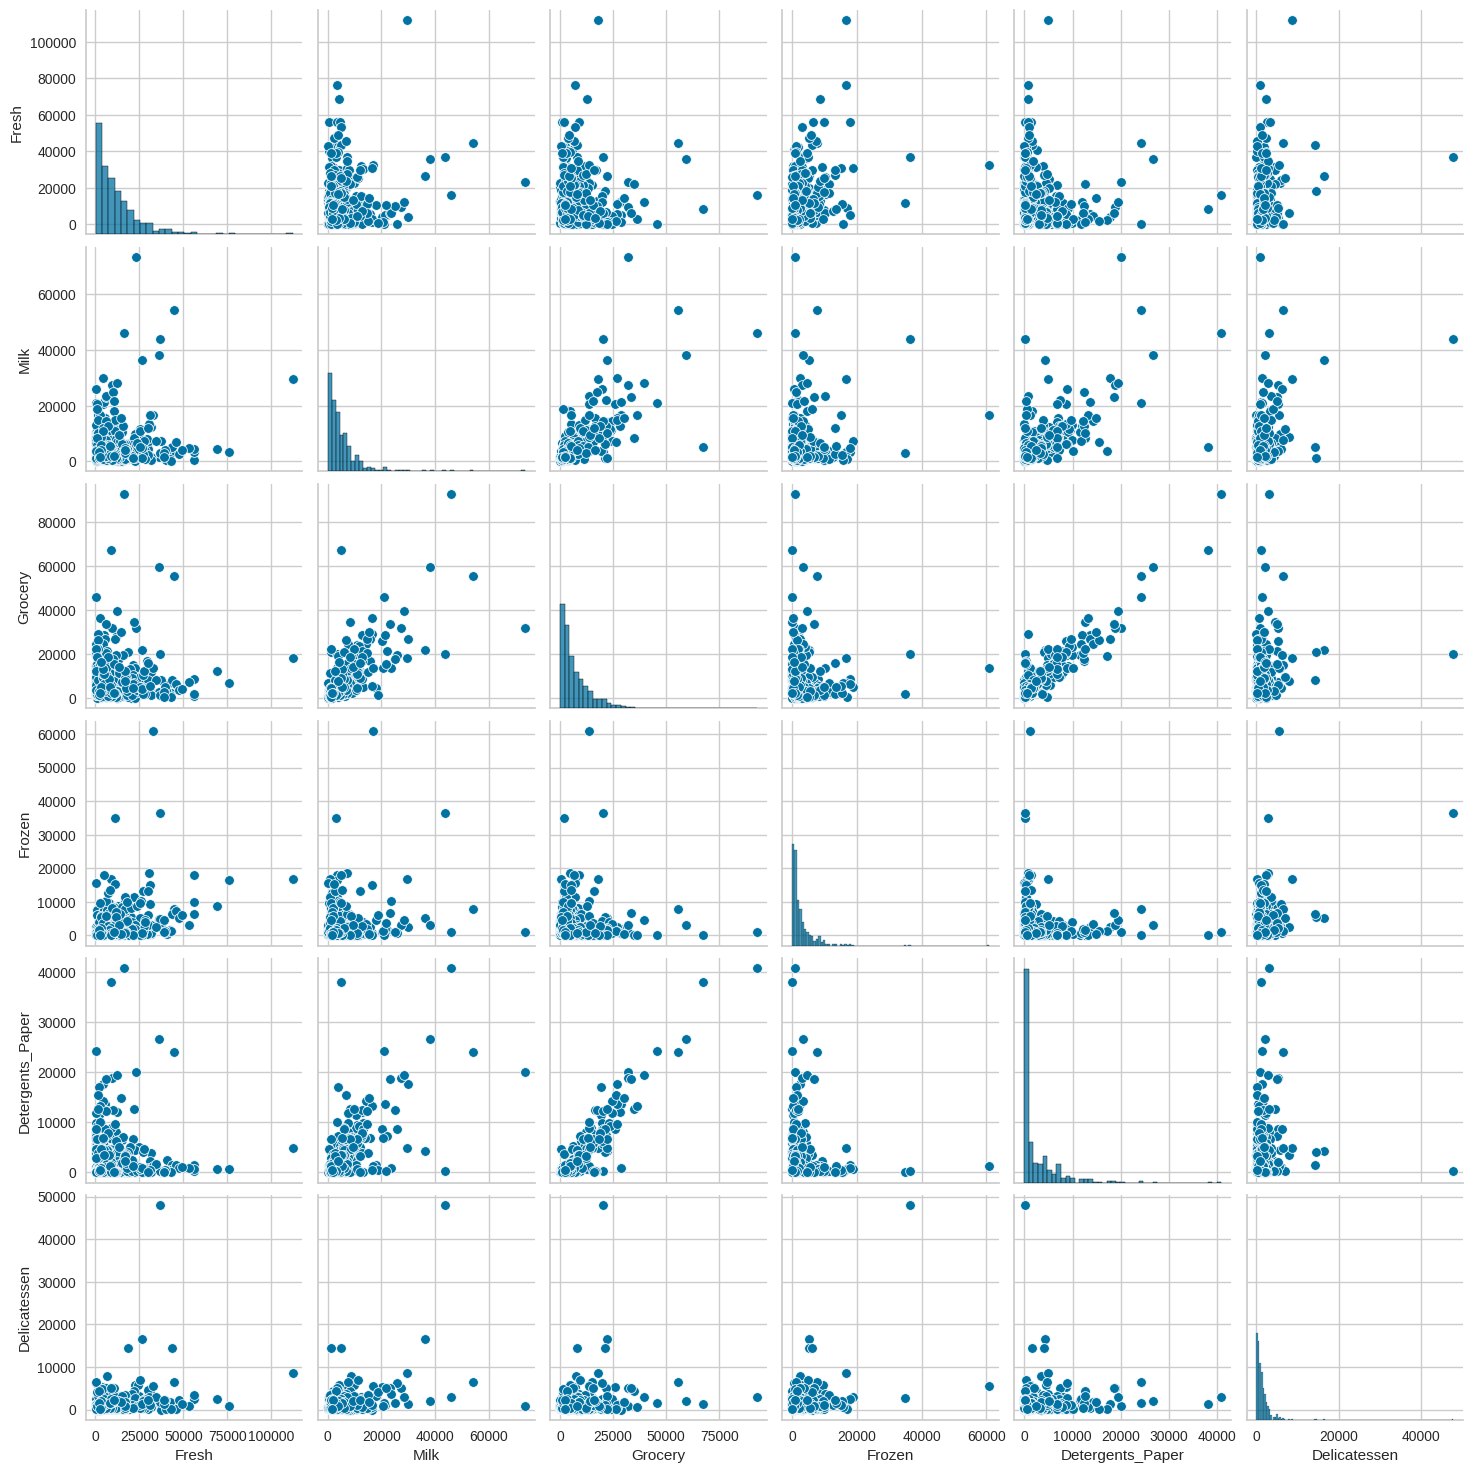

In [89]:
sns.pairplot(df)

#ACP

L'ACP (Analyse en Composantes Principales) est une technique de réduction de dimension utilisée en statistique et en apprentissage automatique.

#**ACP linéaire**

L'ACP linéaire (Analyse en Composantes Principales linéaire) est une méthode de réduction de dimension utilisée en statistique et en apprentissage automatique. Son objectif est de transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées appelées composantes principales.

Pourquoi utiliser l’ACP linéaire ?

✅ Réduction de dimension : utile pour visualiser et traiter des jeux de données avec de nombreuses variables.

✅ Détection de structures cachées : identifie les directions de plus grande variance dans les données.

✅ Prétraitement pour l'apprentissage automatique : peut réduire le bruit et améliorer les performances des modèles.

In [90]:
data = df.drop(['Channel','Region'],axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Standardisation

La standardisation est une transformation des données qui permet de mettre toutes les variables sur une même échelle, en leur donnant :

une moyenne de 0

un écart-type de 1

In [91]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [92]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [93]:
np.save('training_data.npy',data)

In [94]:
pca=PCA(n_components=2)
res_pca = pca.fit_transform(data)

In [95]:
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

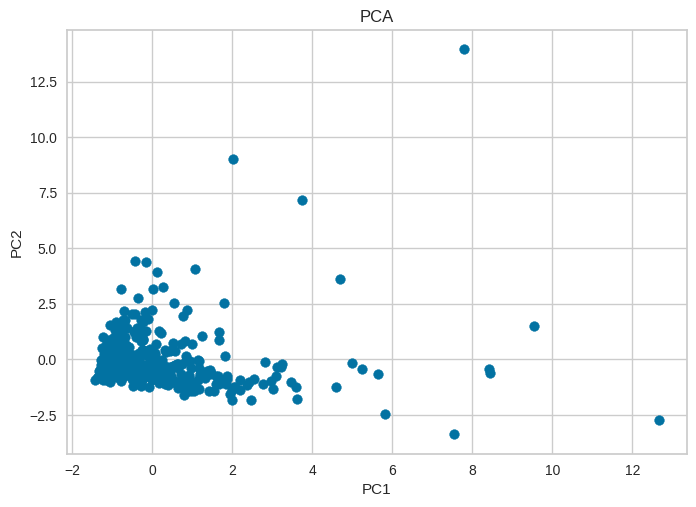

In [96]:
plt.scatter(res_pca[:,0],res_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [97]:
pearsonr(res_pca[:,0],res_pca[:,1])

PearsonRResult(statistic=-2.940356291780688e-16, pvalue=0.9999999999999947)

#ACP non-linéaire

L’ACP non-linéaire est une version améliorée de l’ACP classique, adaptée aux relations complexes entre variables. Selon le type de données, on peut choisir :

✅ Kernel PCA pour une approche plus mathématique

✅ Autoencodeurs pour des solutions basées sur l’apprentissage profond

In [98]:
data = np.load('training_data.npy')

In [99]:
kpca = KernelPCA(n_components=2,kernel='rbf')
res_kpca = kpca.fit_transform(data)

In [100]:
res_pca


array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

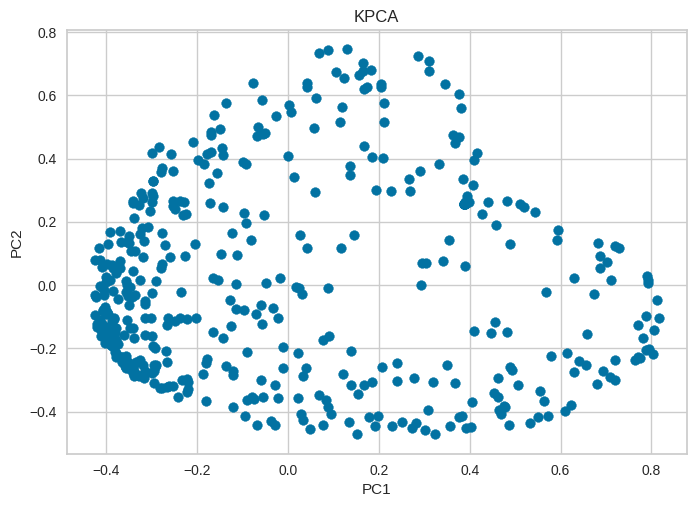

In [101]:
plt.scatter(res_kpca[:,0],res_kpca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KPCA')
plt.show()

In [102]:
pearsonr(res_kpca[:,0],res_kpca[:,1])

PearsonRResult(statistic=-2.0166160408230382e-17, pvalue=1.0)

In [103]:
pearsonr(res_pca[:,0],res_pca[:,1]) > pearsonr(res_kpca[:,0],res_kpca[:,1])

False

In [104]:
df['x_kpca'] = res_kpca[:,0]
df['y_kpca'] = res_kpca[:,1]

In [105]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca,y_kpca
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


#Determinons le nombre de cluster avec la methode du coude

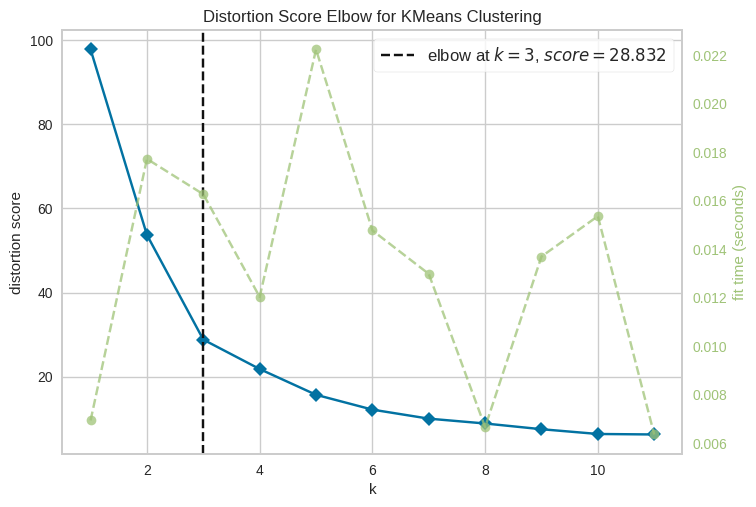

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12))
visualizer.fit(res_kpca)
visualizer.show()

nous pouvons prendre k = 5

#Clustering K-means

In [107]:
cluster_model = KMeans(n_clusters=5, random_state=42)
cluster_model.fit(res_kpca)
clusters = cluster_model.predict(res_kpca)

In [108]:
clusters

array([0, 0, 4, 1, 4, 2, 2, 0, 2, 3, 0, 2, 4, 3, 4, 2, 0, 2, 4, 2, 1, 2,
       4, 4, 4, 2, 2, 2, 3, 4, 1, 2, 1, 4, 2, 0, 4, 3, 3, 4, 4, 1, 3, 3,
       0, 3, 3, 4, 0, 3, 2, 2, 4, 0, 1, 2, 4, 3, 2, 0, 0, 4, 0, 3, 2, 4,
       0, 0, 2, 2, 1, 4, 1, 1, 0, 1, 2, 3, 2, 2, 2, 3, 0, 1, 2, 4, 4, 4,
       1, 1, 2, 1, 4, 4, 0, 2, 0, 2, 2, 1, 3, 3, 0, 4, 2, 1, 0, 3, 0, 3,
       2, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 4, 4, 1, 4, 0, 4, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 4, 4, 1, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 3, 1, 0, 3, 0, 2, 1, 3, 0, 3, 0, 2, 2, 2, 3, 3, 0, 3, 2, 0,
       4, 2, 2, 2, 0, 4, 0, 4, 2, 2, 2, 0, 0, 0, 1, 2, 2, 3, 2, 1, 4, 0,
       2, 2, 3, 3, 4, 2, 2, 3, 2, 0, 0, 3, 1, 4, 2, 0, 0, 3, 3, 1, 3, 2,
       1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 4, 4, 1,
       1, 2, 0, 3, 2, 1, 2, 2, 2, 4, 1, 4, 4, 1, 2, 2, 4, 4, 2, 1, 1, 2,
       3, 4, 3, 1, 3, 1, 2, 2, 0, 4, 2, 2, 4, 4, 1, 0, 2, 2, 4, 4, 4, 4,
       2, 1, 1, 4, 2, 2, 2, 3, 1, 2, 1, 2, 0, 2, 2,

In [109]:
df['Clusters'] = cluster_model.predict(res_kpca)


In [110]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca,y_kpca,Clusters
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,0
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,0
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,4
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,1
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,4


In [112]:
for i in range(5):
    print(f"Cluster {i}:")
    print(df[df['Clusters'] == i].describe())
    print("\n")

Cluster 0:
              Fresh          Milk       Grocery       Frozen  \
count     65.000000     65.000000     65.000000    65.000000   
mean    5010.815385   6713.061538   9540.538462  1217.676923   
std     4709.000129   2493.924598   2408.194831  1354.775340   
min        9.000000   1534.000000   3823.000000    25.000000   
25%     1531.000000   5266.000000   8025.000000   333.000000   
50%     3317.000000   6343.000000   9670.000000   799.000000   
75%     7579.000000   8323.000000  11091.000000  1619.000000   
max    19913.000000  12939.000000  16483.000000  6269.000000   

       Detergents_Paper  Delicatessen     x_kpca     y_kpca  Clusters  
count         65.000000     65.000000  65.000000  65.000000      65.0  
mean        3856.338462   1197.492308   0.131161  -0.329000       0.0  
std         1610.216603    991.006782   0.149783   0.125567       0.0  
min           93.000000      3.000000  -0.121747  -0.472219       0.0  
25%         3143.000000    244.000000   0.021893  -0

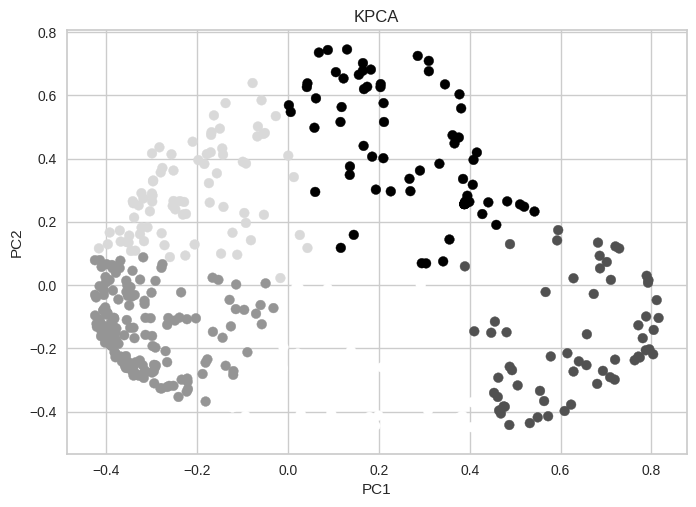

In [113]:
plt.scatter(res_kpca[:,0],res_kpca[:,1],c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KPCA')
plt.show()

#interpretation

In [119]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca,y_kpca,Clusters
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,0
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,0
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,4
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,1
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,4


In [120]:
df['Clusters'].unique()

array([0, 4, 1, 2, 3], dtype=int32)

centroïdes

In [124]:
# Filter the features list to include only numeric columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the mean for numeric features only
cluster_means = df.groupby('Clusters')[numeric_features].mean()
print(cluster_means)

                 Fresh          Milk       Grocery       Frozen  \
Clusters                                                          
0          5010.815385   6713.061538   9540.538462  1217.676923   
1         17569.506173   2351.679012   3157.061728  4259.222222   
2          6538.062893   2390.238994   2977.622642  1705.238994   
3          5357.064516  11624.112903  19493.741935  1360.161290   
4         29583.671233  11270.945205  12885.630137  7836.178082   

          Detergents_Paper  Delicatessen    x_kpca    y_kpca  Clusters  
Clusters                                                                
0              3856.338462   1197.492308  0.131161 -0.329000       0.0  
1               554.802469   1123.481481 -0.211891  0.288001       1.0  
2               693.496855    844.452830 -0.314677 -0.138485       2.0  
3              8571.064516   1598.661290  0.629501 -0.174067       3.0  
4              4528.547945   3681.082192  0.269072  0.422852       4.0  


In [126]:
df.groupby(['Clusters','Channel','Region'])[numeric_features].mean()

Fresh          Milk       Grocery  \
Clusters Channel Region                                             
0        HoReCa  Lisboa   3218.333333   7438.166667   7476.500000   
                 Other    3332.312500   5690.250000   8992.187500   
         Retail  Lisboa   2443.333333   6128.333333   9281.333333   
                 Other    6374.567568   7013.243243  10133.918919   
                 Porto    3295.666667   7600.333333   9534.000000   
1        HoReCa  Lisboa  16912.176471   1504.000000   2178.823529   
                 Other   18005.255319   2370.978723   2898.021277   
                 Porto   17039.636364   1979.818182   3843.454545   
         Retail  Lisboa  15927.000000   5955.000000   7413.500000   
                 Other   17521.500000   4948.500000   6342.500000   
2        HoReCa  Lisboa   6580.461538   2444.615385   2693.269231   
                 Other    6021.242991   2297.859813   2595.775701   
                 Porto    7070.600000   1708.266667   4009.933333   
         Retail  Lisboa   2790.000000   2527.000000   5265.000000   
                 Other   11887.428571   4446.714286   5953.571429   
                 Porto   10708.666667   3779.666667   6193.333333   
3        HoReCa  Lisboa   2806.000000  10765.000000  15538.000000   
                 Other   11908.500000  15602.500000  14858.000000   
         Retail  Lisboa   3337.300000  10983.100000  21127.900000   
                 Other    5849.205128  11311.128205  19740.820513   
                 Porto    4402.300000  12776.000000  18218.700000   
4        HoReCa  Lisboa  31168.666667   9313.333333   7786.666667   
                 Other   34887.564103   6569.153846   5962.948718   
                 Porto   16360.000000   8558.500000  10323.500000   
         Retail  Lisboa   9126.500000  25729.500000  36640.000000   
                 Other   23057.333333  22303.388889  25736.555556   
                 Porto   17490.000000   4241.666667  26943.666667   

                               Frozen  Detergents_Paper  Delicatessen  \
Clusters Channel Region                                                 
0        HoReCa  Lisboa   1071.666667       2718.500000    960.000000   
                 Other    1080.687500       3090.312500   1139.812500   
         Retail  Lisboa   1662.000000       5195.666667    793.000000   
                 Other    1306.621622       4179.351351   1342.108108   
                 Porto     699.000000       4894.333333    601.000000   
1        HoReCa  Lisboa   3719.529412        289.588235   1137.647059   
                 Other    4368.574468        514.808511   1026.404255   
                 Porto    4963.727273        505.000000   1198.000000   
         Retail  Lisboa   5040.000000       1761.500000   1845.000000   
                 Other    2940.250000       1685.500000   1638.250000   
2        HoReCa  Lisboa   1858.769231        860.153846    621.769231   
                 Other    1663.766355        499.775701    908.700935   
                 Porto    1986.000000        444.933333    775.200000   
         Retail  Lisboa   5612.000000        788.000000   1360.000000   
                 Other     954.857143       2626.000000    727.571429   
                 Porto     898.666667       2860.666667    930.000000   
3        HoReCa  Lisboa   1374.000000       5828.000000   2388.000000   
                 Other    3388.000000       2680.500000   3507.000000   
         Retail  Lisboa   1435.400000       9015.300000   1827.500000   
                 Other    1292.384615       8617.410256   1521.333333   
                 Porto    1142.300000       9398.500000   1210.800000   
4        HoReCa  Lisboa   7238.666667        739.444444   2997.555556   
                 Other    9338.282051        859.282051   3836.794872   
                 Porto   38235.000000        643.500000   3079.500000   
         Retail  Lisboa   5741.000000      19002.000000   3995.500000   
                 Other    2316.277778      11587.833333   3